# Using the Newton Raphson method to find the cdf inverse

1103.5633019460001s is th time it takes currently to synthesise modulation angles so we wanna cut this donw big time.

NR takes 345.594460949 seconds!!!

This method is used to find the roots of functions ie what value of x gives f(x)=0 so how do i use it to find f(x)=random ???

The scipy.optimize.newton function is used to find the roots of a scalar function. If you have a function f(x)=y and you want to find the value of x for a given y, you can use this function to find the root of the equation f(x)−y=0

In [14]:
1103.5633019460001/60

18.3927216991

In [46]:
345.594460949/60

5.759907682483333

In [1]:
import time
import multiprocessing
import qpo_search as q
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import os 
import glob
from scipy import stats
from scipy import optimize
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table
import csv
import math
import stingray
import lightcurve
from stingray import Lightcurve
#from stingray import Powerspqpoectrum
from stingray import AveragedPowerspectrum
from stingray import Crossspectrum
from stingray.exceptions import StingrayError
from stingray import AveragedCrossspectrum
from more_itertools import locate
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import scipy
from scipy import stats
from scipy import optimize
from scipy.stats import f
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import erfinv, erf
#from sklearn import preprocessing
from pynverse import inversefunc
import pynverse
import warnings
warnings.filterwarnings('ignore')
from concurrent.futures import ThreadPoolExecutor
from joblib import Parallel, delayed
from multiprocessing import Process
import threading
import multiprocessing as mp
from multiprocessing import Pool
from functools import partial

import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import os 
import glob
import pandas as pd
from scipy import stats
from scipy import optimize
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table
import csv
import math
import stingray
import lightcurve
from stingray import Lightcurve
from stingray import Powerspectrum
from stingray import AveragedPowerspectrum
from stingray import Crossspectrum
from stingray.exceptions import StingrayError
from stingray import AveragedCrossspectrum
from more_itertools import locate
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import scipy.integrate as spi
import pynverse
from pynverse import inversefunc
import functools
from functools import partial
import warnings
from multiprocessing import Pool
warnings.filterwarnings('ignore')


FIXED bug: Im not getting any events with modulation angles within the last two modulation angle bins => the second derivative of the mod func was wrong

10000000000000
0.0001294820003749919
1.5272869151356478


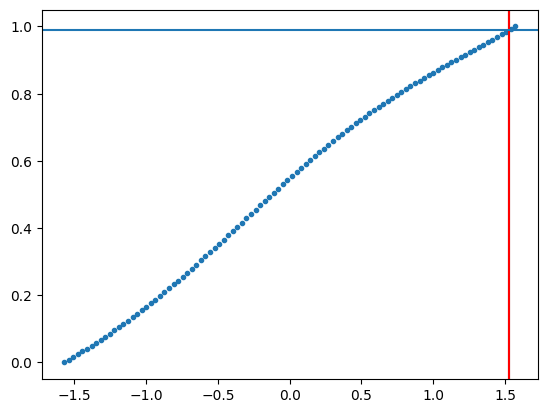

In [247]:
def inverse_NR_test(file,mu,p,psi):
    with fits.open(str(file)) as hdu:
            data_12=hdu[1].data  #reading in DU1+DU2
            #psi=-18
            #p=4
            mod_angle_list=(np.linspace(np.radians(-90),np.radians(90),100))
            mue=np.loadtxt('mue')[:,2]
            modulation_factor_12=np.array([mue[int(i)] for i in data_12.field('PI')])
            modmin=np.radians(-90)
            modmax=np.radians(90)
            mod_angle_array_12=[]
            psi=np.radians(psi)
            for mod_fac in modulation_factor_12[:10]:
                #mod_fac=modulation_factor_12[0]############
                cdf_12=(lambda phi:(1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) #define the cdf
                    #cdf_12_nopol=(lambda phi: (1/np.pi)*(phi - modmin))

                mod_function=(lambda phi: (1/np.pi) * (1 + (mod_fac * p * np.cos(2 * (psi-phi)) ) ))

                mod_function_derivative=(lambda phi: ((1/np.pi)*2*mod_fac*p*np.sin(psi-phi)))


                cdf_min_12=cdf_12(modmin)
                cdf_max_12=cdf_12(modmax) #define the min and max vals
                random_12=np.random.uniform(cdf_min_12,cdf_max_12) #select a point between these min and max

                #random_12=(cdf_max_12*0.34)
                #random_12=cdf_12(cdf_max_12/2)
                #print(random_12)

                #initial_guess=(random_12*np.pi)+modmin

                cdf_NR=(lambda phi:((1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) - random_12)

                initial_guess=(random_12*np.pi)+modmin

                #start=time.process_time()
                #new_null_func('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
                #stop=time.process_time()
                #print(stop-start)


                #mod_angle_array_12.append(inversefunc(cdf_12, y_values=random_12)) #and then recover what mod angle would produce this cdf value
                #what would be the angle in the case of no polarisation?
                #initial_guess=(2*random_12*np.pi)+modmin
                #tol=[0.000000000000001,0.00000000001,0.001,0.01,0.1,1,10,100,1000,10000,100000,10000000000000]
                #for i in tol:
                start=time.process_time()
                print(i)
                start=time.process_time()
                NR_root=optimize.newton(cdf_NR,x0=initial_guess,fprime=mod_function,fprime2=mod_function_derivative,tol=100000000000000)
                stop=time.process_time()
                print(stop-start)
                print(NR_root)


                a=(inversefunc(cdf_12, y_values=random_12))

                mod_angle_array_12.append(NR_root)
                plt.figure()
                plt.plot(mod_angle_list,cdf_12(mod_angle_list),'.')
                plt.axvline(x=a,color='black')
                plt.axvline(x=NR_root,color='red')

                plt.axhline(y = random_12)
                plt.show()

                        #print(mod_angle_array_12)


In [219]:
def new_null_newton(file12,mue_file,p,psi):
    #print('started')
    #print(iterable)
    #first do the things we only need to do once
    with fits.open(str(file12)) as hdu:
            data_12=hdu[1].data  #reading in DU1+DU2
    
  
            mue=np.loadtxt(mue_file)[:,2]
            modulation_factor_12=np.array([mue[int(i)] for i in data_12.field('PI')])
            modmin=np.radians(-90)
            modmax=np.radians(90)
            mod_angle_array_12=[]
            psi=np.radians(psi)
            for mod_fac in modulation_factor_12: #for each modulation factor of each photon in the fits file we...
                
                cdf_12=(lambda phi:(1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) #define the cdf
                #cdf_12_nopol=(lambda phi: (1/np.pi)*(phi - modmin))
                
                mod_function=(lambda phi: (1/np.pi) * (1 + (mod_fac * p * np.cos(2 * (psi-phi)) ) ))
                
                mod_function_derivative=(lambda phi: ((1/np.pi)*2*mod_fac*p*np.sin(psi-phi)))
                
                
                cdf_min_12=cdf_12(modmin)
                cdf_max_12=cdf_12(modmax) #define the min and max vals
                random_12=np.random.uniform(cdf_min_12,cdf_max_12) #select a point between these min and max
              #  random_12=np.random.uniform(cdf_max_12*0.3)
                #
                #random_12=cdf_12(cdf_max_12*0.3)
                #print(random_12)
                
                #initial_guess=(random_12*np.pi)+modmin
                
                cdf_NR=(lambda phi:((1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) - random_12)
                
                initial_guess=(random_12*np.pi)+modmin
                
                #mod_angle_array_12.append(inversefunc(cdf_12, y_values=random_12)) #and then recover what mod angle would produce this cdf value
                #what would be the angle in the case of no polarisation?
                #initial_guess=(2*random_12*np.pi)+modmin
               
                NR_root=optimize.newton(cdf_NR,x0=initial_guess,fprime=mod_function,fprime2=mod_function_derivative,tol=100000000000)
                #print(NR_root)
                mod_angle_array_12.append(NR_root)
    #np.savetxt('/home/c2032014/PhD/Results/new_null/new_null_NR1_maydet1_mod_angles.txt',mod_angle_array_12)
    
                    #print(mod_angle_array_12)

  #              print('mod angles calculated')

In [217]:
start=time.process_time()

new_null_newton('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01_src.fits','/home/c2032014/PhD/muE.txt',0.04,-18)

stop=time.process_time()
print('time',stop-start)

time 320.0609385550006


In [220]:
start=time.process_time()

new_null_newton('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01_src.fits','/home/c2032014/PhD/muE.txt',0.04,-18)

stop=time.process_time()
print('time',stop-start)

time 154.95441925999967


In [142]:
start=time.process_time()

new_null_newton('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det2_evt1pt5_v01_src.fits','/home/c2032014/PhD/muE.txt',0.04,-18)

stop=time.process_time()
print(stop-start)

288.08992672600016


In [146]:
start=time.process_time()

new_null_newton('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det3_evt1pt5_v01_src.fits','/home/c2032014/PhD/muE.txt',0.04,-18)

stop=time.process_time()
print(stop-start)

272.13880948599945


In [148]:
# Concatenate two text files in Python
file1_path = '/home/c2032014/PhD/Results/new_null/new_null_NR1_maydet1_mod_angles.txt'
file2_path = '/home/c2032014/PhD/Results/new_null/new_null_NR1_maydet2_mod_angles.txt'
output_path = '/home/c2032014/PhD/Results/new_null/new_null_NR1_maydet12_mod_angles.txt'

with open(file1_path, 'r') as file1:
    content1 = file1.read()

with open(file2_path, 'r') as file2:
    content2 = file2.read()

# Concatenate the contents
concatenated_content = content1 + '\n' + content2

# Write the concatenated content to a new file
with open(output_path, 'w') as output_file:
    output_file.write(concatenated_content)


In [94]:
def new_null_normal(file12,mue_file,p,psi):
    #print('started')
    #print(iterable)
    #first do the things we only need to do once
    with fits.open(str(file12)) as hdu:
            data_12=hdu[1].data  #reading in DU1+DU2
    
  #  with fits.open(str(file3)) as hdu2:
  #          data_header=hdu2[1].header #reading in header 
  #          data_3=hdu2[1].data #reading in DU3
            #print(data_3)
            #energy cut
         #   index_energy=list(locate(data_12.field('PI'), lambda x: Pmin < x < Pmax))  
         #   data_12=data_12[index_energy]
         #   index_energy_3=list(locate(data_3.field('PI'), lambda x: Pmin < x < Pmax))
         #   data_3=data_3[index_energy_3]

            #quality factor cut
         #   index_qual_12=list(locate(data_12.field('QUAL'), lambda x: x==1)) 
         #   data_12=data_12[index_qual_12]
         #   index_qual_3=list(locate(data_3.field('QUAL'), lambda x: x==1))  
         #   data_3=data_3[index_qual_3]

         #   TSTART=data_header['TSTART']
         #   TSTOP=data_header['TSTOP']
         #   curve_duration=TSTOP-TSTART

          #  TIME=data_12.field('TIME')
          #  TIME_3=data_3.field('TIME')
            #print(TIME_3)

          #  GTI=list(np.loadtxt(str(GTI_file)))
            #Lightcurves for norm
        #    lightcurve_12=Lightcurve.make_lightcurve(TIME,dt=bin_length,tstart=TSTART,gti=GTI)
        #    lightcurve_12.apply_gtis()
            #print('lc 12')
            #print(len(lightcurve_12.counts))
            #plt.figure()
            #plt.plot(lightcurve_12.time,lightcurve_12.counts)
            #plt.show()


        #    lc_ref=Lightcurve.make_lightcurve(TIME_3,dt=bin_length,tstart=TSTART,gti=GTI)
        #    lc_ref.apply_gtis()
            #print('lc ref')
            #print(len(lc_ref.counts))
            #plt.figure()
            #plt.plot(lc_ref.time,lc_ref.counts)
            #plt.show()

            #Cross spec for norm ie over all mod angle bins

       #     avg_cs = AveragedCrossspectrum.from_lightcurve(lightcurve_12,lc_ref,seg_length,norm='frac')
            #print('avg cs')


       #     norm_power_real=avg_cs.power.real  #cross spec properties
       #     norm_power_im=avg_cs.power.imag
       #     norm_freq=avg_cs.freq


            #real power of all mod cross spec (for norm constant and 2019 errorbars)
       #     norm_d = {'real_power': np.array(avg_cs.power.real), 'all_fourier_freq': np.array(avg_cs.freq)} #total pwr and freq in dataset
       #     df_norm = pd.DataFrame(data=norm_d)
       #     selected_rows_norm = df_norm[(df_norm['all_fourier_freq'] >= fmin) & (df_norm['all_fourier_freq'] <= fmax)] #selecting freq range
       #     av_power_norm_real=selected_rows_norm['real_power'].mean() #calculating mean pwr

            #av_power_norm_array.append(av_power_norm_real)

            #calculating normalisation constant

       #     norm_factor=(np.sqrt((fmax-fmin))/np.sqrt(av_power_norm_real))
            #norm_factor_array.append(norm_factor) 
            #np.savetxt('Results/norm_cs_'+str(source_name)+'_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',norm_factor_array)

            #making a list of mod angle bins to select over
      #      mod_minimum=np.radians(modmin)
      #      mod_maximum=np.radians(modmax)
      #      aspace=np.linspace(mod_minimum,mod_maximum,mod_bin_number+1)
      #      mod_angle_list=[(aspace[i-1],aspace[i]) for i in range(len(aspace))]  #making a list of mod angle bins to select over
      #      mod_angle_list.pop(0) #removing the dodger first one

            mue=np.loadtxt(mue_file)[:,2]
            modulation_factor_12=np.array([mue[int(i)] for i in data_12.field('PI')])
            #print(modulation_factor_12)
     #       modulation_factor_3=np.array([mue[int(i)] for i in data_3.field('PI')])

            #for mod_fac in modulation_factor_12:
            #    print(mod_fac)

      #      run_num=0


      #      mod_G_stacked=[]
      #      arg_G_stacked=[]
      #      d_mod_G_stacked=[]
      #      d_arg_G_stacked=[]
    
      #      G_running_sum=np.zeros(mod_bin_number,dtype=complex)
      #      dG_running_sum=np.zeros(mod_bin_number)
      #      norm_power_running_sum=np.zeros(mod_bin_number)

       #     while run_num<99:
                #print('in while loop')
       #         run_num+=1
                #print()
            modmin=np.radians(-90)
            modmax=np.radians(90)
            mod_angle_array_12=[]
            psi=np.radians(psi)
       #         mod_angle_array_3=[]
                #print('{} core {} run'.format(iterable,run_num))
            for mod_fac in modulation_factor_12:
 #                   #print(mod_fac)
 #
                cdf_12=(lambda phi:(1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi ) )))
                cdf_min_12=cdf_12(modmin)
                cdf_max_12=cdf_12(modmax)
                random_12=np.random.uniform(cdf_min_12,cdf_max_12)
                #random_12=cdf_12(phi=cdf_max_12/2)
                #print(random_12)
                mod_angle_array_12.append(inversefunc(cdf_12, y_values=random_12))
                print(mod_angle_array_12)

  #              print('mod angles calculated')

In [95]:
start=time.process_time()
new_null_normal('/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',0.04,-18)
#new_null_newton('cygx1_may','1','/home/c2032014/PhD/CYGX1_MAY/ixpe01002901_det1_evt1pt5_v01.fits','/home/c2032014/PhD/muE.txt',51,200,4,-18)
stop=time.process_time()

[array(-0.91791269)]
[array(-0.91791269), array(-1.23689214)]
[array(-0.91791269), array(-1.23689214), array(0.42253833)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079), array(-0.85675319)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079), array(-0.85675319), array(1.19284683)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079), array(-0.85675319), array(1.19284683), array(0.60192287)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079), array(-0.85675319), array(1.19284683), array(0.60192287), array(-0.18500166)]
[array(-0.91791269), array(-1.23689214), array(0.42253833), array(1.54698939), array(-1.25826079), array(-0.8

KeyboardInterrupt: 

In [13]:
print(stop-start)

1103.5633019460001


               # for mod_fac in modulation_factor_3:
               #     cdf_3=(lambda i: (1/np.pi) * (i +  (mu*p*0.5) * (np.sin((2*i)-(2*psi)) + np.sin(2*psi))))
               #     cdf_min_3=cdf(np.radians(0))
               #     cdf_max_3=cdf(np.radians(180))
               #     random_3=np.random.uniform(cdf_min,cdf_max)
               #     mod_angle_array_3.append(inversefunc(cdf_3, y_values=random_3))


                av_power_G_array=[]
                m_array=[]
                av_power_array_mod_ps_12=[]
                av_power_array_mod_ps_3=[]
                av_power_array_real=[]
                av_power_array_im=[]
                #mod_angle_array_12=data_12.field('PHI')

                for i in mod_angle_list:
                    mod_min=i[0]
                    #print(np.degrees(mod_min))
                    mod_max=i[1]

                    #print(np.degrees(mod_max))

                    index_mod_angle=[mod_min<=k<=mod_max for k in mod_angle_array_12] #define the index over mod angle
                    data_bin_12=data_12[index_mod_angle] #selecting/indexing the photons that meet the criteria of this mod angle range

                   # print('len data bin 12',len(data_bin_12))
                    TIME_12=data_bin_12['TIME']
                    #print(TIME_12)
                              #print(TIME_12)

                    #making subject lightcurve
                    lc_12=Lightcurve.make_lightcurve(TIME_12,dt=bin_length,tstart=TSTART,gti=GTI)
                    lc_12.apply_gtis()

                       #making subject lightcurve
                    lc_12=Lightcurve.make_lightcurve(TIME_12,dt=bin_length,tstart=TSTART,gti=GTI)
                    lc_12.apply_gtis()

                    #print('lc sub')

                    #plt.figure()
                    #plt.plot(lc_12.time,lc_12.counts)
                    #plt.show()
                    #making powerspectrum for errorbars
                        #power spectrum used for frac rms errorbars
                    ps_12=Powerspectrum.from_lightcurve(lc_12,seg_length,norm='frac')
                    ps_3=Powerspectrum.from_lightcurve(lc_ref,seg_length,norm='frac')

                    #making averagd cross spectrum
                    cs = AveragedCrossspectrum.from_lightcurve(lc_12,lc_ref,seg_length,norm='frac') #making averagd cross spec
                    mod_G=np.sqrt((cs.power.real)**2+(cs.power.imag**2))
                    m=cs.m



                    fourier_f=cs.freq
                    real_power=cs.power.real   #real and im power of G
                    im_power=cs.power.imag

                   #averaging the modulus of G to use in drms

                    #d_G_ = {'G': np.array(mod_G), 'fourier_freq': np.array(cs.freq)}
                    #df_G = pd.DataFrame(data=d_G_)
                    #selected_rows_G = df_G[(df_G['fourier_freq'] >= fmin) & (df_G['fourier_freq'] <= fmax)]

                    #print(selected_rows_G[:1000])

                    freq_index=list(locate(np.array(cs.freq), lambda x: fmin <= x <= fmax))

                    mod_G_selected=mod_G[freq_index]
                    #print(mod_G_selected[:1000])


                    av_power_G=mod_G_selected.mean()
                    #print('modulus of G mean: {}'.format(av_power_G))
                    av_power_G_array.append(av_power_G)
                    #np.savetxt('Results/av_G_mod'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_G_array)




                   #averaging the power spectrum over fourier freq for drms errorbars

                    mod_ps_12=ps_12.power.real #this is because the poewr spectrum is real by definition!
                    mod_ps_3=ps_3.power.real


                    #d_mod_ps_12 = {'mod_power_ps_12': np.array(mod_ps_12), 'fourier_freq': np.array(ps_12.freq)}
                    #df_mod_ps_12 = pd.DataFrame(data=d_mod_ps_12)
                    #selected_rows_mod_ps_12 = df_mod_ps_12[(df_mod_ps_12['fourier_freq'] >= fmin) & (df_mod_ps_12['fourier_freq'] <= fmax)]
                    selected_rows_mod_ps_12=mod_ps_12[freq_index]
                    av_power_mod_ps_12=selected_rows_mod_ps_12.mean()
                    av_power_array_mod_ps_12.append(av_power_mod_ps_12)


                    #d_mod_ps_3 = {'mod_power_ps_3': np.array(mod_ps_3), 'fourier_freq': np.array(ps_3.freq)}
                    #df_mod_ps_3 = pd.DataFrame(data=d_mod_ps_3)
                    #selected_rows_mod_ps_3 = df_mod_ps_3[(df_mod_ps_3['fourier_freq'] >= fmin) & (df_mod_ps_3['fourier_freq'] <= fmax)]
                    selected_rows_mod_ps_3=mod_ps_3[freq_index]
                    av_power_mod_ps_3=selected_rows_mod_ps_3.mean()
                    av_power_array_mod_ps_3.append(av_power_mod_ps_3)



                    #Average real power over frequency range
                    #d_real = {'real_power': np.array(real_power), 'fourier_freq': np.array(cs.freq),'dPco':np.array(dPco)}
                    #df_real = pd.DataFrame(data=d_real)
                    #selected_rows_real = df_real[(df_real['fourier_freq'] >= fmin) & (df_real['fourier_freq'] <= fmax)]
                    selected_rows_real=real_power[freq_index]
                    av_power_real=selected_rows_real.mean()
                    av_power_array_real.append(av_power_real)
                    #np.savetxt('Results/G_av_real_'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_array_real)


                    #Average imaginary power over frequency
                    #d_im = {'im_power': np.array(im_power), 'fourier_freq': np.array(cs.freq),'dPcoim': np.array(dPcoim)}
                    #df_im = pd.DataFrame(data=d_im)
                    #selected_rows_im = df_im[(df_im['fourier_freq'] >= fmin) & (df_im['fourier_freq'] <= fmax)]
                    selected_rows_im=im_power[freq_index]
                    av_power_im=selected_rows_im.mean()
                    av_power_array_im.append(av_power_im)
                    #np.savetxt('Results/G_av_im_'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_array_im)


                    #everything i want from a single run    
                    #mod_G_av=np.sqrt(np.array(av_power_array_real)**2+np.array(av_power_array_im)**2)


                    #complex_G=[av_power_array_real+1j*av_power_array_im for i in range(len(av_power_array_real))]
                    complex_G=[complex(a,b) for a, b in zip(av_power_array_real, av_power_array_im)] 

                    #print('{} core {} run complex G {}'.format(iterable,run_num,complex_G))
                    #arg_G_av=np.vectorize(np.angle(complex_G))
                    d_mod_G=np.sqrt((1/(2*(len(selected_rows_real)*cs.m)))*((av_power_mod_ps_12*av_power_mod_ps_3)-((av_power_mod_ps_3/(av_power_norm_real))*(av_power_G**2))))
                    #d_arg_G_av=d_mod_G/av_power_G
                    #print(d_mod_G)

                dG_running_sum+=d_mod_G**2 #squared so it can be stacked in quadrature
                G_running_sum+=complex_G
                #print('{} core {} run  Gsum {}'.format(iterable,run_num,G_running_sum))
                #norm_power_running_sum+=av_power_norm_real
                #print('G sum',G_running_sum)
                #print('dG sum',dG_running_sum)
                #print('norm power sum',norm_power_running_sum)
                G_running_average=G_running_sum/(run_num)
                dG_running_average=np.sqrt(dG_running_sum)/(run_num)
                #norm_power_running_average=norm_power_running_sum/(run_num)
                #print('average',G_running_average)
                #print('dG average',dG_running_average)
                #print('norm av',norm_power_running_average)


            np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_G.txt',G_running_average)
            np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_dG.txt',dG_running_average)
            #np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_norm_power.txt',norm_power_running_average)

In [221]:
def new_null_1_core_angletest(source_name,file12,file3,mue_file,GTI_file,run_num_tot,cpu_num,Pmin,Pmax,bin_length,seg_length,fmin,fmax,modmin,modmax,mod_bin_number,p,psi):
    #print('started')
    #print(iterable)
    #first do the things we only need to do once
    with fits.open(str(file12)) as hdu:
            data_12=hdu[1].data  #reading in DU1+DU2
    
    with fits.open(str(file3)) as hdu2:
            data_header=hdu2[1].header #reading in header 
            data_3=hdu2[1].data #reading in DU3
            #print(data_3)
            #energy cut
            index_energy=list(locate(data_12.field('PI'), lambda x: Pmin < x < Pmax))  
            data_12=data_12[index_energy]
            index_energy_3=list(locate(data_3.field('PI'), lambda x: Pmin < x < Pmax))
            data_3=data_3[index_energy_3]

            #quality factor cut
            index_qual_12=list(locate(data_12.field('QUAL'), lambda x: x==1)) 
            data_12=data_12[index_qual_12]
            index_qual_3=list(locate(data_3.field('QUAL'), lambda x: x==1))  
            data_3=data_3[index_qual_3]

            TSTART=data_header['TSTART']
            TSTOP=data_header['TSTOP']
            curve_duration=TSTOP-TSTART

            TIME=data_12.field('TIME')
            TIME_3=data_3.field('TIME')
            #print(TIME_3)

            GTI=list(np.loadtxt(str(GTI_file)))
            #Lightcurves for norm
            lightcurve_12=Lightcurve.make_lightcurve(TIME,dt=bin_length,tstart=TSTART,gti=GTI)
            lightcurve_12.apply_gtis()
            #print('lc 12')
            #print(len(lightcurve_12.counts))
            #plt.figure()
            #plt.plot(lightcurve_12.time,lightcurve_12.counts)
            #plt.show()


            lc_ref=Lightcurve.make_lightcurve(TIME_3,dt=bin_length,tstart=TSTART,gti=GTI)
            lc_ref.apply_gtis()
            #print('lc ref')
            #print(len(lc_ref.counts))
            #plt.figure()
            #plt.plot(lc_ref.time,lc_ref.counts)
            #plt.show()

            #Cross spec for norm ie over all mod angle bins

            avg_cs = AveragedCrossspectrum.from_lightcurve(lightcurve_12,lc_ref,seg_length,norm='frac')
            #print('avg cs')


            norm_power_real=avg_cs.power.real  #cross spec properties
            norm_power_im=avg_cs.power.imag
            norm_freq=avg_cs.freq


            #real power of all mod cross spec (for norm constant and 2019 errorbars)
            norm_d = {'real_power': np.array(avg_cs.power.real), 'all_fourier_freq': np.array(avg_cs.freq)} #total pwr and freq in dataset
            df_norm = pd.DataFrame(data=norm_d)
            selected_rows_norm = df_norm[(df_norm['all_fourier_freq'] >= fmin) & (df_norm['all_fourier_freq'] <= fmax)] #selecting freq range
            av_power_norm_real=selected_rows_norm['real_power'].mean() #calculating mean pwr

            #av_power_norm_array.append(av_power_norm_real)

            #calculating normalisation constant

            norm_factor=(np.sqrt((fmax-fmin))/np.sqrt(av_power_norm_real))
            #norm_factor_array.append(norm_factor) 
            #np.savetxt('Results/norm_cs_'+str(source_name)+'_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',norm_factor_array)

            #making a list of mod angle bins to select over
            mod_minimum=np.radians(modmin)
            mod_maximum=np.radians(modmax)
            aspace=np.linspace(mod_minimum,mod_maximum,mod_bin_number+1)
            mod_angle_list=[(aspace[i-1],aspace[i]) for i in range(len(aspace))]  #making a list of mod angle bins to select over
            mod_angle_list.pop(0) #removing the dodger first one

            mue=np.loadtxt(mue_file)[:,2]
            modulation_factor_12=np.array([mue[int(i)] for i in data_12.field('PI')])
            #print(modulation_factor_12)
            modulation_factor_3=np.array([mue[int(i)] for i in data_3.field('PI')])

            #for mod_fac in modulation_factor_12:
            #    print(mod_fac)

            run_num=0


            mod_G_stacked=[]
            arg_G_stacked=[]
            d_mod_G_stacked=[]
            d_arg_G_stacked=[]
    
            G_running_sum=np.zeros(mod_bin_number,dtype=complex)
            dG_running_sum=np.zeros(mod_bin_number)
            norm_power_running_sum=np.zeros(mod_bin_number)

            while run_num<99:
                #print('in while loop')
                run_num+=1
                #print()
                mod_angle_array_12=[]
                mod_angle_array_3=[]
                #print('{} core {} run'.format(iterable,run_num))
                
                
                
                for mod_fac in modulation_factor_12: #for each modulation factor of each photon in the fits file we...
                
                    cdf_12=(lambda phi:(1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) #define the cdf
                    #cdf_12_nopol=(lambda phi: (1/np.pi)*(phi - modmin))

                    mod_function=(lambda phi: (1/np.pi) * (1 + (mod_fac * p * np.cos(2 * (psi-phi)) ) ))

                    mod_function_derivative=(lambda phi: ((1/np.pi)*2*mod_fac*p*np.sin(psi-phi)))


                    cdf_min_12=cdf_12(modmin)
                    cdf_max_12=cdf_12(modmax) #define the min and max vals
                    random_12=np.random.uniform(cdf_min_12,cdf_max_12) #select a point between these min and max
                  #  random_12=np.random.uniform(cdf_max_12*0.3)
                    #
                    #random_12=cdf_12(cdf_max_12*0.3)
                    #print(random_12)

                    #initial_guess=(random_12*np.pi)+modmin

                    cdf_NR=(lambda phi:((1/np.pi)*( phi - modmin + 0.5*mod_fac*p * ( np.sin( 2*phi - 2*psi ) - np.sin( 2*modmin - 2*psi )) )) - random_12)

                    initial_guess=(random_12*np.pi)+modmin

                    #mod_angle_array_12.append(inversefunc(cdf_12, y_values=random_12)) #and then recover what mod angle would produce this cdf value
                    #what would be the angle in the case of no polarisation?
                    #initial_guess=(2*random_12*np.pi)+modmin

                    NR_root=optimize.newton(cdf_NR,x0=initial_guess,fprime=mod_function,fprime2=mod_function_derivative,tol=100000000000)
                    print(NR_root)
                    mod_angle_array_12.append(NR_root)
                    
                
                
                    a=inversefunc(cdf_12, y_values=random_12)
                    print(a)
                    mod_angle_array_12.append(inversefunc(cdf_12, y_values=random_12))
                    #print(mod_angle_array_12)

  #              print('mod angles calculated')




               # for mod_fac in modulation_factor_3:
               #     cdf_3=(lambda i: (1/np.pi) * (i +  (mu*p*0.5) * (np.sin((2*i)-(2*psi)) + np.sin(2*psi))))
               #     cdf_min_3=cdf(np.radians(0))
               #     cdf_max_3=cdf(np.radians(180))
               #     random_3=np.random.uniform(cdf_min,cdf_max)
               #     mod_angle_array_3.append(inversefunc(cdf_3, y_values=random_3))

In [ ]:
                av_power_G_array=[]
                m_array=[]
                av_power_array_mod_ps_12=[]
                av_power_array_mod_ps_3=[]
                av_power_array_real=[]
                av_power_array_im=[]
                #mod_angle_array_12=data_12.field('PHI')

                for i in mod_angle_list:
                    mod_min=i[0]
                    #print(np.degrees(mod_min))
                    mod_max=i[1]

                    #print(np.degrees(mod_max))

                    index_mod_angle=[mod_min<=k<=mod_max for k in mod_angle_array_12] #define the index over mod angle
                    data_bin_12=data_12[index_mod_angle] #selecting/indexing the photons that meet the criteria of this mod angle range

                   # print('len data bin 12',len(data_bin_12))
                    TIME_12=data_bin_12['TIME']
                    #print(TIME_12)
                              #print(TIME_12)

                    #making subject lightcurve
                    lc_12=Lightcurve.make_lightcurve(TIME_12,dt=bin_length,tstart=TSTART,gti=GTI)
                    lc_12.apply_gtis()

                       #making subject lightcurve
                    lc_12=Lightcurve.make_lightcurve(TIME_12,dt=bin_length,tstart=TSTART,gti=GTI)
                    lc_12.apply_gtis()

                    #print('lc sub')

                    #plt.figure()
                    #plt.plot(lc_12.time,lc_12.counts)
                    #plt.show()
                    #making powerspectrum for errorbars
                        #power spectrum used for frac rms errorbars
                    ps_12=Powerspectrum.from_lightcurve(lc_12,seg_length,norm='frac')
                    ps_3=Powerspectrum.from_lightcurve(lc_ref,seg_length,norm='frac')

                    #making averagd cross spectrum
                    cs = AveragedCrossspectrum.from_lightcurve(lc_12,lc_ref,seg_length,norm='frac') #making averagd cross spec
                    mod_G=np.sqrt((cs.power.real)**2+(cs.power.imag**2))
                    m=cs.m



                    fourier_f=cs.freq
                    real_power=cs.power.real   #real and im power of G
                    im_power=cs.power.imag

                   #averaging the modulus of G to use in drms

                    #d_G_ = {'G': np.array(mod_G), 'fourier_freq': np.array(cs.freq)}
                    #df_G = pd.DataFrame(data=d_G_)
                    #selected_rows_G = df_G[(df_G['fourier_freq'] >= fmin) & (df_G['fourier_freq'] <= fmax)]

                    #print(selected_rows_G[:1000])

                    freq_index=list(locate(np.array(cs.freq), lambda x: fmin <= x <= fmax))

                    mod_G_selected=mod_G[freq_index]
                    #print(mod_G_selected[:1000])


                    av_power_G=mod_G_selected.mean()
                    #print('modulus of G mean: {}'.format(av_power_G))
                    av_power_G_array.append(av_power_G)
                    #np.savetxt('Results/av_G_mod'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_G_array)




                   #averaging the power spectrum over fourier freq for drms errorbars

                    mod_ps_12=ps_12.power.real #this is because the poewr spectrum is real by definition!
                    mod_ps_3=ps_3.power.real


                    #d_mod_ps_12 = {'mod_power_ps_12': np.array(mod_ps_12), 'fourier_freq': np.array(ps_12.freq)}
                    #df_mod_ps_12 = pd.DataFrame(data=d_mod_ps_12)
                    #selected_rows_mod_ps_12 = df_mod_ps_12[(df_mod_ps_12['fourier_freq'] >= fmin) & (df_mod_ps_12['fourier_freq'] <= fmax)]
                    selected_rows_mod_ps_12=mod_ps_12[freq_index]
                    av_power_mod_ps_12=selected_rows_mod_ps_12.mean()
                    av_power_array_mod_ps_12.append(av_power_mod_ps_12)


                    #d_mod_ps_3 = {'mod_power_ps_3': np.array(mod_ps_3), 'fourier_freq': np.array(ps_3.freq)}
                    #df_mod_ps_3 = pd.DataFrame(data=d_mod_ps_3)
                    #selected_rows_mod_ps_3 = df_mod_ps_3[(df_mod_ps_3['fourier_freq'] >= fmin) & (df_mod_ps_3['fourier_freq'] <= fmax)]
                    selected_rows_mod_ps_3=mod_ps_3[freq_index]
                    av_power_mod_ps_3=selected_rows_mod_ps_3.mean()
                    av_power_array_mod_ps_3.append(av_power_mod_ps_3)



                    #Average real power over frequency range
                    #d_real = {'real_power': np.array(real_power), 'fourier_freq': np.array(cs.freq),'dPco':np.array(dPco)}
                    #df_real = pd.DataFrame(data=d_real)
                    #selected_rows_real = df_real[(df_real['fourier_freq'] >= fmin) & (df_real['fourier_freq'] <= fmax)]
                    selected_rows_real=real_power[freq_index]
                    av_power_real=selected_rows_real.mean()
                    av_power_array_real.append(av_power_real)
                    #np.savetxt('Results/G_av_real_'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_array_real)


                    #Average imaginary power over frequency
                    #d_im = {'im_power': np.array(im_power), 'fourier_freq': np.array(cs.freq),'dPcoim': np.array(dPcoim)}
                    #df_im = pd.DataFrame(data=d_im)
                    #selected_rows_im = df_im[(df_im['fourier_freq'] >= fmin) & (df_im['fourier_freq'] <= fmax)]
                    selected_rows_im=im_power[freq_index]
                    av_power_im=selected_rows_im.mean()
                    av_power_array_im.append(av_power_im)
                    #np.savetxt('Results/G_av_im_'+str(source_name)+'_'+str(mod_bin_number)+'_bins_freqs_'+str(fmin)+'_'+str(fmax)+'_'+str(bin_length)+'_'+str(seg_length)+'.txt',av_power_array_im)


                    #everything i want from a single run    
                    #mod_G_av=np.sqrt(np.array(av_power_array_real)**2+np.array(av_power_array_im)**2)


                    #complex_G=[av_power_array_real+1j*av_power_array_im for i in range(len(av_power_array_real))]
                    complex_G=[complex(a,b) for a, b in zip(av_power_array_real, av_power_array_im)] 

                    #print('{} core {} run complex G {}'.format(iterable,run_num,complex_G))
                    #arg_G_av=np.vectorize(np.angle(complex_G))
                    d_mod_G=np.sqrt((1/(2*(len(selected_rows_real)*cs.m)))*((av_power_mod_ps_12*av_power_mod_ps_3)-((av_power_mod_ps_3/(av_power_norm_real))*(av_power_G**2))))
                    #d_arg_G_av=d_mod_G/av_power_G
                    #print(d_mod_G)

                dG_running_sum+=d_mod_G**2 #squared so it can be stacked in quadrature
                G_running_sum+=complex_G
                #print('{} core {} run  Gsum {}'.format(iterable,run_num,G_running_sum))
                #norm_power_running_sum+=av_power_norm_real
                #print('G sum',G_running_sum)
                #print('dG sum',dG_running_sum)
                #print('norm power sum',norm_power_running_sum)
                G_running_average=G_running_sum/(run_num)
                dG_running_average=np.sqrt(dG_running_sum)/(run_num)
                #norm_power_running_average=norm_power_running_sum/(run_num)
                #print('average',G_running_average)
                #print('dG average',dG_running_average)
                #print('norm av',norm_power_running_average)


            np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_G.txt',G_running_average)
            np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_dG.txt',dG_running_average)
            #np.savetxt(f'/mnt/zfsusers/ixpemel/new_null/{source_name}_{iterable}_stacked_av_norm_power.txt',norm_power_running_average)